In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load a sample dataset
# You can replace this with your own dataset
data = datasets.load_iris()  # Example: Iris dataset
X = data.data  # Features
y = data.target  # Target labels

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the SVM model
svm_model = SVC()

# Define the hyperparameter grid
#C: Controls the trade-off between achieving a low error on the training data and minimizing the model complexity.
#kernel: Specifies the kernel type to be used in the algorithm (e.g., linear, RBF, polynomial).
#gamma: Defines how far the influence of a single training example reaches.
#degree: Degree of the polynomial kernel function (only used if kernel='poly')
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],         # Kernel coefficient
    'degree': [2, 3, 4]                 # Degree for polynomial kernel
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
print("\nValidation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9714285714285715

Validation Set Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22


Test Set Performance:
Accuracy: 0.9565217391304348
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.90      0.95        10
           2       0.88      1.00      0.93         7

    accuracy                           0.96        23
   macro avg       0.96      0.97      0.96        23
weigh

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example: Train and evaluate baseline models for classification
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
baseline_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Evaluate performance
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    # Store results
    baseline_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print baseline results
print("Baseline Results:")
for model, metrics in baseline_results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Baseline Results:

Logistic Regression:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

Random Forest:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

SVM:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000


In [38]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and performance
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9523809523809523


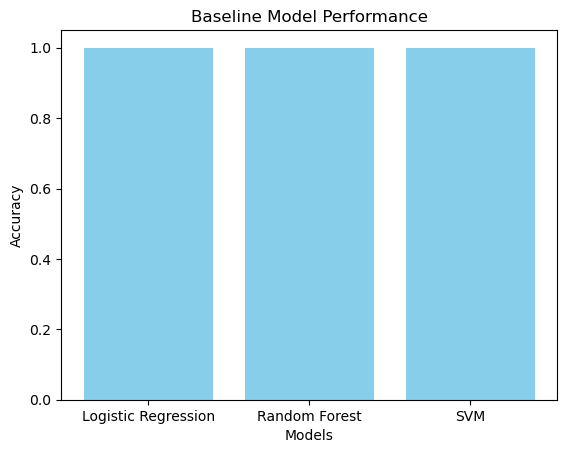

In [40]:
import matplotlib.pyplot as plt

# Example: Visualizing model performance
model_names = list(baseline_results.keys())
accuracies = [metrics['Accuracy'] for metrics in baseline_results.values()]

plt.bar(model_names, accuracies, color='skyblue')
plt.title("Baseline Model Performance")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()
